---

<h1 style="text-align:center;font-size: 30px;">         Week 1: Exploratory Data Analysis</h1>

---

<center><img style="width: 700px;" src="https://www.researchify.co.uk/generator/data.gif"></center>

---

## Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import scipy.stats as st
import pandas_profiling
import warnings
import missingno as msno
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#For setting the charts size globally
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.title_fontsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
#reading the dataset
Train=pd.read_csv("train.csv")
Test=pd.read_csv("test.csv")

Train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
print(Train.shape)
print(Test.shape)

(1460, 81)
(1459, 80)


In [ ]:
Train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

- **Quantitative**: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

- Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [ ]:
#getting dataset info
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Plotting the Percentage of Missing values in each feature

In [ ]:
# Number of of null values in each column
count=round(Train.isnull().sum(),2)
percent=round((Train.isnull().sum()/Train.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
data[data['Missing Values Count']!=0]

index  Missing Values Count  Missing Values %
3    LotFrontage                   259             17.74
6          Alley                  1369             93.77
25    MasVnrType                     8              0.55
26    MasVnrArea                     8              0.55
30      BsmtQual                    37              2.53
31      BsmtCond                    37              2.53
32  BsmtExposure                    38              2.60
33  BsmtFinType1                    37              2.53
35  BsmtFinType2                    38              2.60
42    Electrical                     1              0.07
57   FireplaceQu                   690             47.26
58    GarageType                    81              5.55
59   GarageYrBlt                    81              5.55
60  GarageFinish                    81              5.55
63    GarageQual                    81              5.55
64    GarageCond                    81              5.55
72        PoolQC                  1453             99.52
73         Fence                  1179             80.75
74   MiscFeature                  1406             96.30

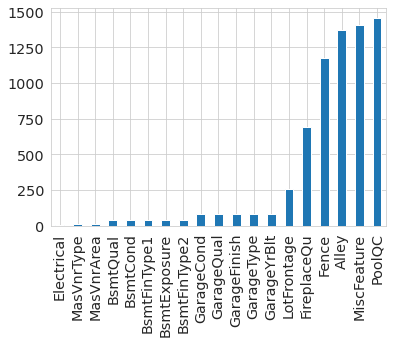

In [ ]:
# plotting missing values barplot
missing = Train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Alley, PoolQC, Fence, MiscFeature columns can be dropped as they have more than 80% of nulls in respective columns

### Checking for duplicate records

In [ ]:
# No duplicates. check
Train.duplicated().sum()

0

### Checking for unique values count in each column

In [ ]:
#How many unique values are present in each column
features=Train.columns
print("Number of unique values are as below:\n")
for i in features:
  uniqueValues=Train[i].nunique()
  uniqueValues_per=round(Train[i].nunique()/Train.shape[0],2)
  print(i,uniqueValues)

Number of unique values are as below:

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea

### Dropping variables obtained from above observations

In [ ]:
#dropping variables obtained from abov observations as they are not useful
dropColList=['Alley', 'PoolQC', 'Fence', 'MiscFeature','Id']
Train.drop(dropColList,axis=1,inplace=True)
Test.drop(dropColList,axis=1,inplace=True)

In [ ]:
print(Train.shape)
print(Test.shape)

(1460, 76)
(1459, 75)


# Univariate Analysis

In [ ]:
# Mean and Median are almost same
Train.describe(include = 'all').T

count unique     top  freq  ...     25%     50%      75%     max
MSSubClass     1460    NaN     NaN   NaN  ...      20      50       70     190
MSZoning       1460      5      RL  1151  ...     NaN     NaN      NaN     NaN
LotFrontage    1201    NaN     NaN   NaN  ...      59      69       80     313
LotArea        1460    NaN     NaN   NaN  ...  7553.5  9478.5  11601.5  215245
Street         1460      2    Pave  1454  ...     NaN     NaN      NaN     NaN
...             ...    ...     ...   ...  ...     ...     ...      ...     ...
MoSold         1460    NaN     NaN   NaN  ...       5       6        8      12
YrSold         1460    NaN     NaN   NaN  ...    2007    2008     2009    2010
SaleType       1460      9      WD  1267  ...     NaN     NaN      NaN     NaN
SaleCondition  1460      6  Normal  1198  ...     NaN     NaN      NaN     NaN
SalePrice      1460    NaN     NaN   NaN  ...  129975  163000   214000  755000

[76 rows x 11 columns]

### Separating Numerical and categorical features for plotting the data

In [ ]:
#separating Numerical and categorical variables
NumericData=Train.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 37
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
#separating Numerical and categorical variables
CategoricData=Train.select_dtypes(include=['object','category'])
rows,col=(CategoricData.shape)
print("Number of Categorical columns are:",col)
print(CategoricData.columns)

Number of Categorical columns are: 39
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


# Univariate Analysis Plots for categorical data

In [ ]:
CategoricData.head()

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0       RL   Pave      Reg  ...          Y       WD        Normal
1       RL   Pave      Reg  ...          Y       WD        Normal
2       RL   Pave      IR1  ...          Y       WD        Normal
3       RL   Pave      IR1  ...          Y       WD       Abnorml
4       RL   Pave      IR1  ...          Y       WD        Normal

[5 rows x 39 columns]

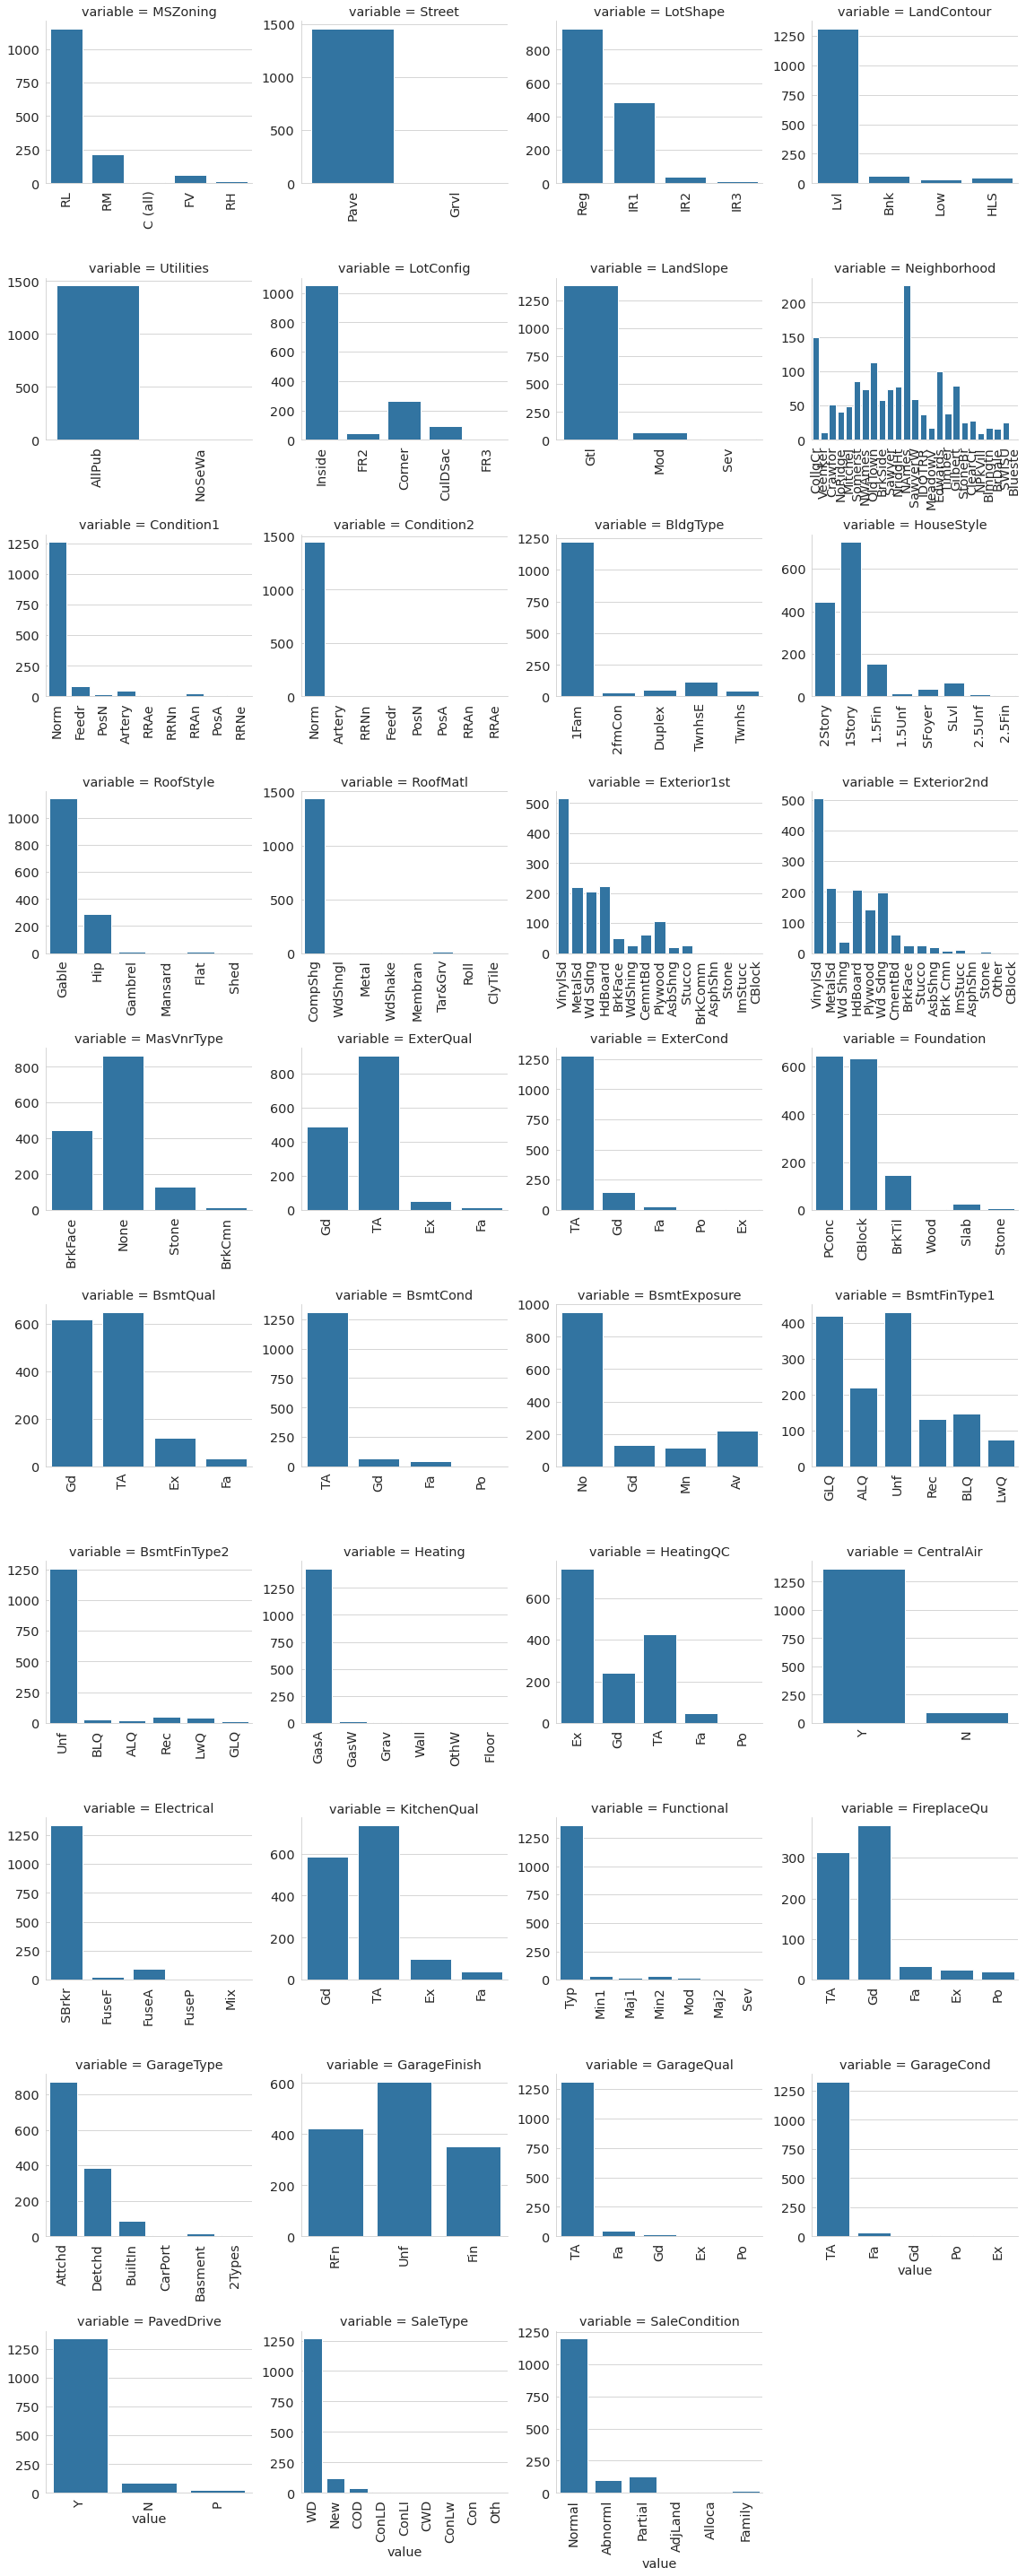

In [ ]:
#melting the dataframe to bring the data into single column
ConvertedCatDataMelt=CategoricData.melt()

#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'MiscVal', 'MoSold', 'YrSold' variables are in int64/float64 type, but they can be treated as categorical. Below are the bar plots for the same.

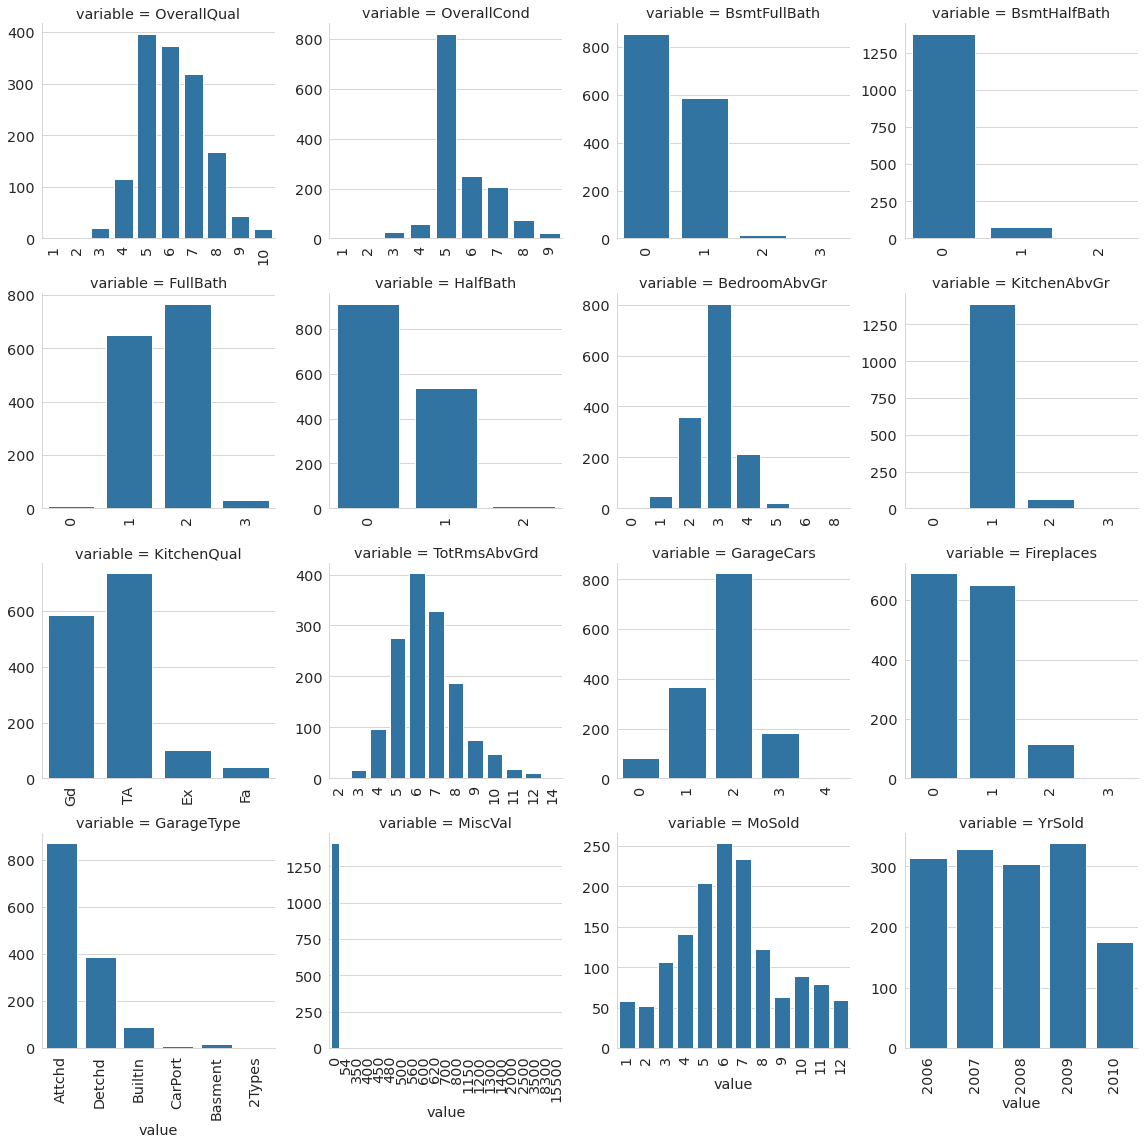

In [ ]:
#melting the dataframe to bring the data into single column
CategoricalConData=Train[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','GarageCars',
'Fireplaces','GarageType','MiscVal','MoSold','YrSold']].copy()

CategoricalConDataMelt=CategoricalConData.melt()

#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(CategoricalConDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

# Univariate Analysis plot for Numerical data

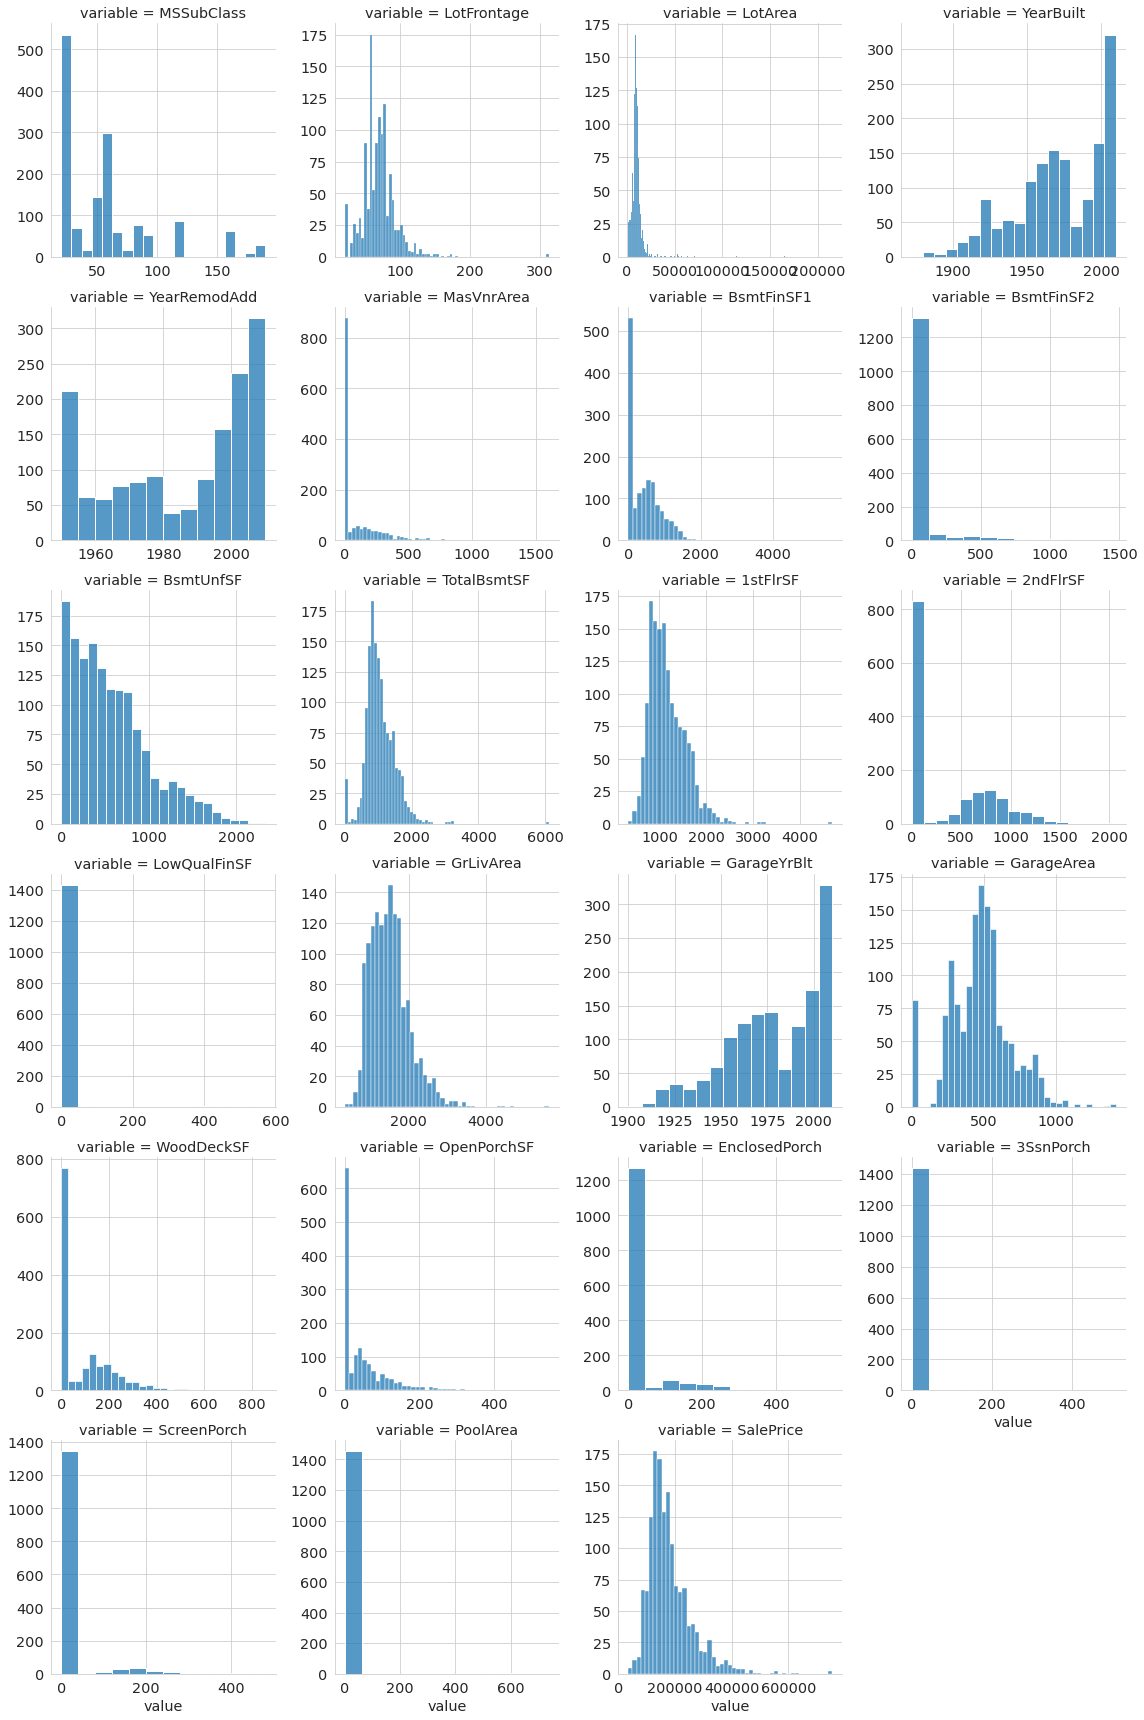

In [ ]:
#histograms for numerical variables
NumericData.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars',
'Fireplaces','MiscVal','MoSold','YrSold'],axis=1,inplace=True)
NumericDataMelt=NumericData.melt()

CatFacetGrid = sns.FacetGrid(NumericDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
#CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.histplot,'value')
plt.show()

In [ ]:
NumericData.shape

(1460, 23)

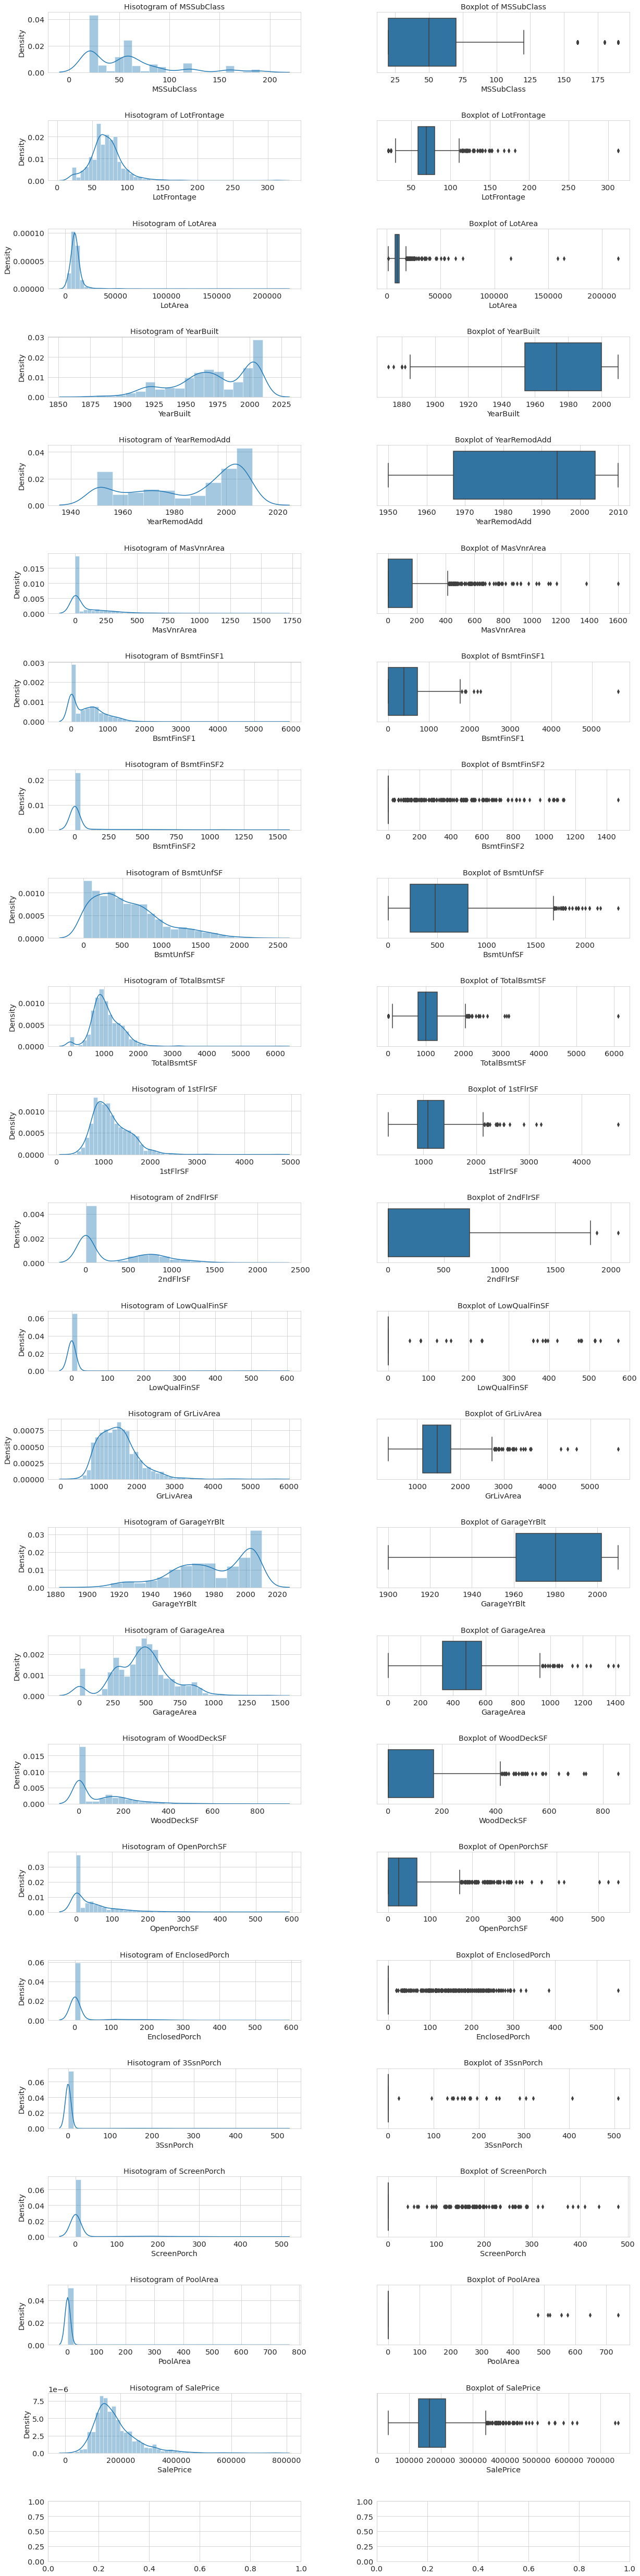

In [ ]:
#distplot and boxplots for numerical variables
fig, axes = plt.subplots(nrows=24,ncols=2,  figsize=(20, 90))
fig.subplots_adjust(hspace = .8, wspace=.3)
i = 0
for col in NumericData.columns:
    if NumericData[col].dtype == 'int64' or NumericData[col].dtype == 'float64':
        sns.distplot(NumericData[col], ax=axes[i][0]).set_title("Hisotogram of " + col)
        sns.boxplot(NumericData[col], ax=axes[i][1]).set_title("Boxplot of " + col)
        i = i + 1

# Bivariate Analysis

## Categorical vs Target variable

In [ ]:
CategoricalConData.columns

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'Fireplaces', 'GarageType', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of YrSold')

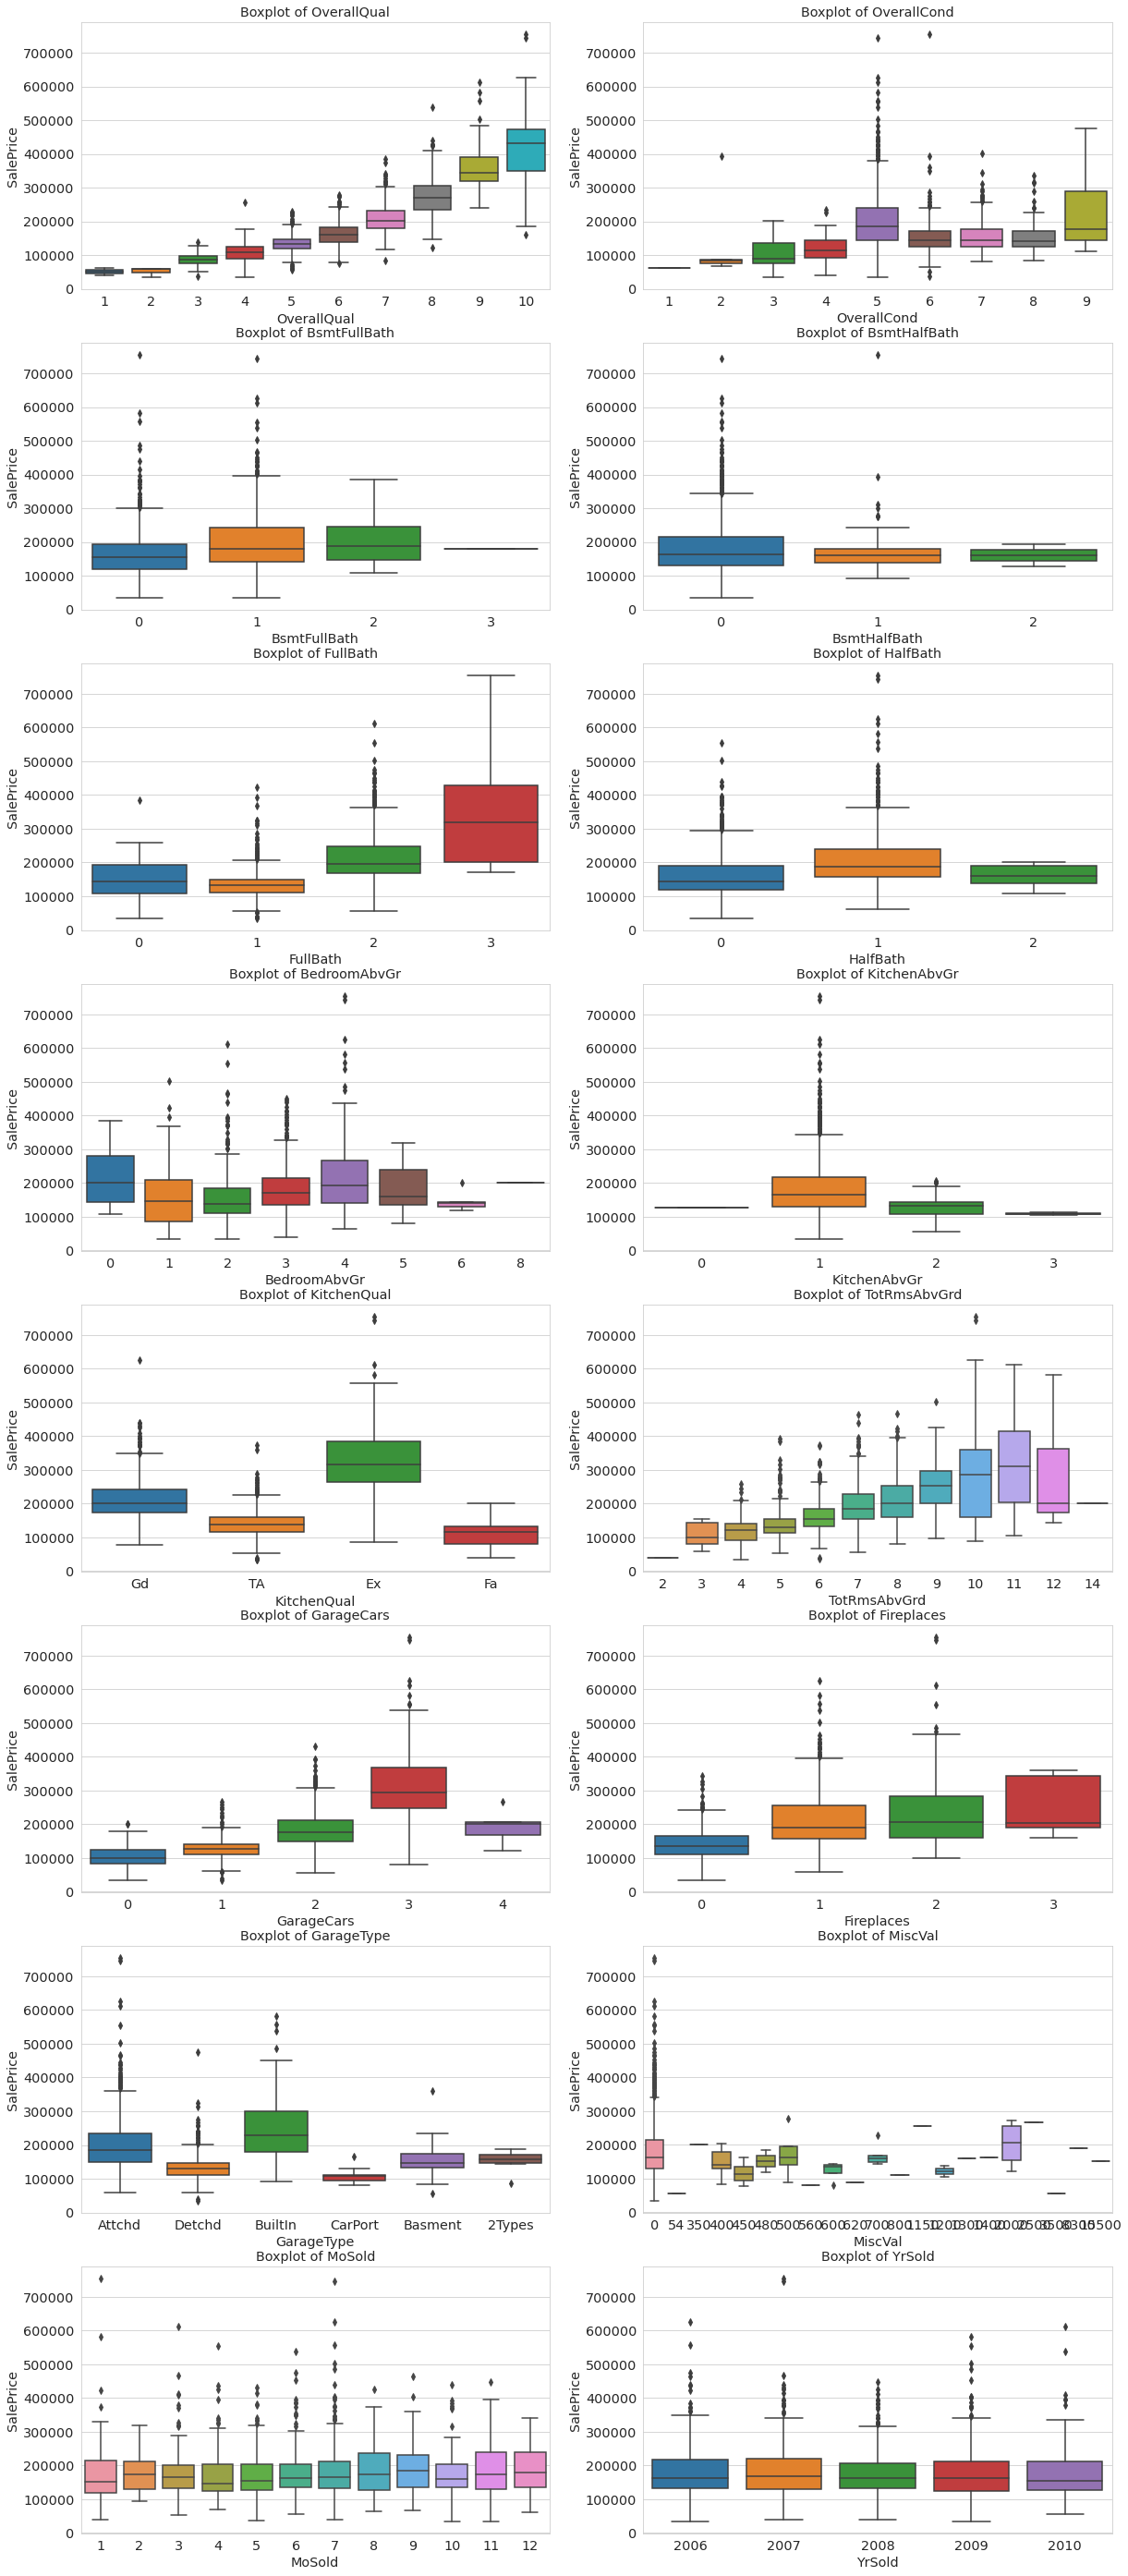

In [ ]:
## PLotting boxplot of all the categorical variable vs target column for Bivariate Analysis
size = (20, 50)
CategoricalConData['SalePrice']=Train['SalePrice']

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .2, wspace=.2)

sns.boxplot(x=CategoricalConData['OverallQual'],y=CategoricalConData['SalePrice'],ax=axs[0][0], ).set_title("Boxplot of OverallQual")
sns.boxplot(x=CategoricalConData['OverallCond'],y=CategoricalConData['SalePrice'],ax=axs[0][1] ).set_title("Boxplot of OverallCond")

sns.boxplot(x=CategoricalConData['BsmtFullBath'],y=CategoricalConData['SalePrice'],ax=axs[1][0], ).set_title("Boxplot of BsmtFullBath")
sns.boxplot(x=CategoricalConData['BsmtHalfBath'],y=CategoricalConData['SalePrice'],ax=axs[1][1] ).set_title("Boxplot of BsmtHalfBath")

sns.boxplot(x=CategoricalConData['FullBath'],y=CategoricalConData['SalePrice'],ax=axs[2][0], ).set_title("Boxplot of FullBath")
sns.boxplot(x=CategoricalConData['HalfBath'],y=CategoricalConData['SalePrice'],ax=axs[2][1] ).set_title("Boxplot of HalfBath")

sns.boxplot(x=CategoricalConData['BedroomAbvGr'],y=CategoricalConData['SalePrice'],ax=axs[3][0], ).set_title("Boxplot of BedroomAbvGr")
sns.boxplot(x=CategoricalConData['KitchenAbvGr'],y=CategoricalConData['SalePrice'],ax=axs[3][1] ).set_title("Boxplot of KitchenAbvGr")

sns.boxplot(x=CategoricalConData['KitchenQual'],y=CategoricalConData['SalePrice'],ax=axs[4][0], ).set_title("Boxplot of KitchenQual")
sns.boxplot(x=CategoricalConData['TotRmsAbvGrd'],y=CategoricalConData['SalePrice'],ax=axs[4][1] ).set_title("Boxplot of TotRmsAbvGrd")

sns.boxplot(x=CategoricalConData['GarageCars'],y=CategoricalConData['SalePrice'],ax=axs[5][0], ).set_title("Boxplot of GarageCars")
sns.boxplot(x=CategoricalConData['Fireplaces'],y=CategoricalConData['SalePrice'],ax=axs[5][1] ).set_title("Boxplot of Fireplaces")

sns.boxplot(x=CategoricalConData['GarageType'],y=CategoricalConData['SalePrice'],ax=axs[6][0], ).set_title("Boxplot of GarageType")
sns.boxplot(x=CategoricalConData['MiscVal'],y=CategoricalConData['SalePrice'],ax=axs[6][1] ).set_title("Boxplot of MiscVal")

sns.boxplot(x=CategoricalConData['MoSold'],y=CategoricalConData['SalePrice'],ax=axs[7][0], ).set_title("Boxplot of MoSold")
sns.boxplot(x=CategoricalConData['YrSold'],y=CategoricalConData['SalePrice'],ax=axs[7][1] ).set_title("Boxplot of YrSold")

In [ ]:
CategoricData['SalePrice']=Train['SalePrice'].copy()

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Shng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'CmentBd'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Brk Cmn'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'CBlock')]

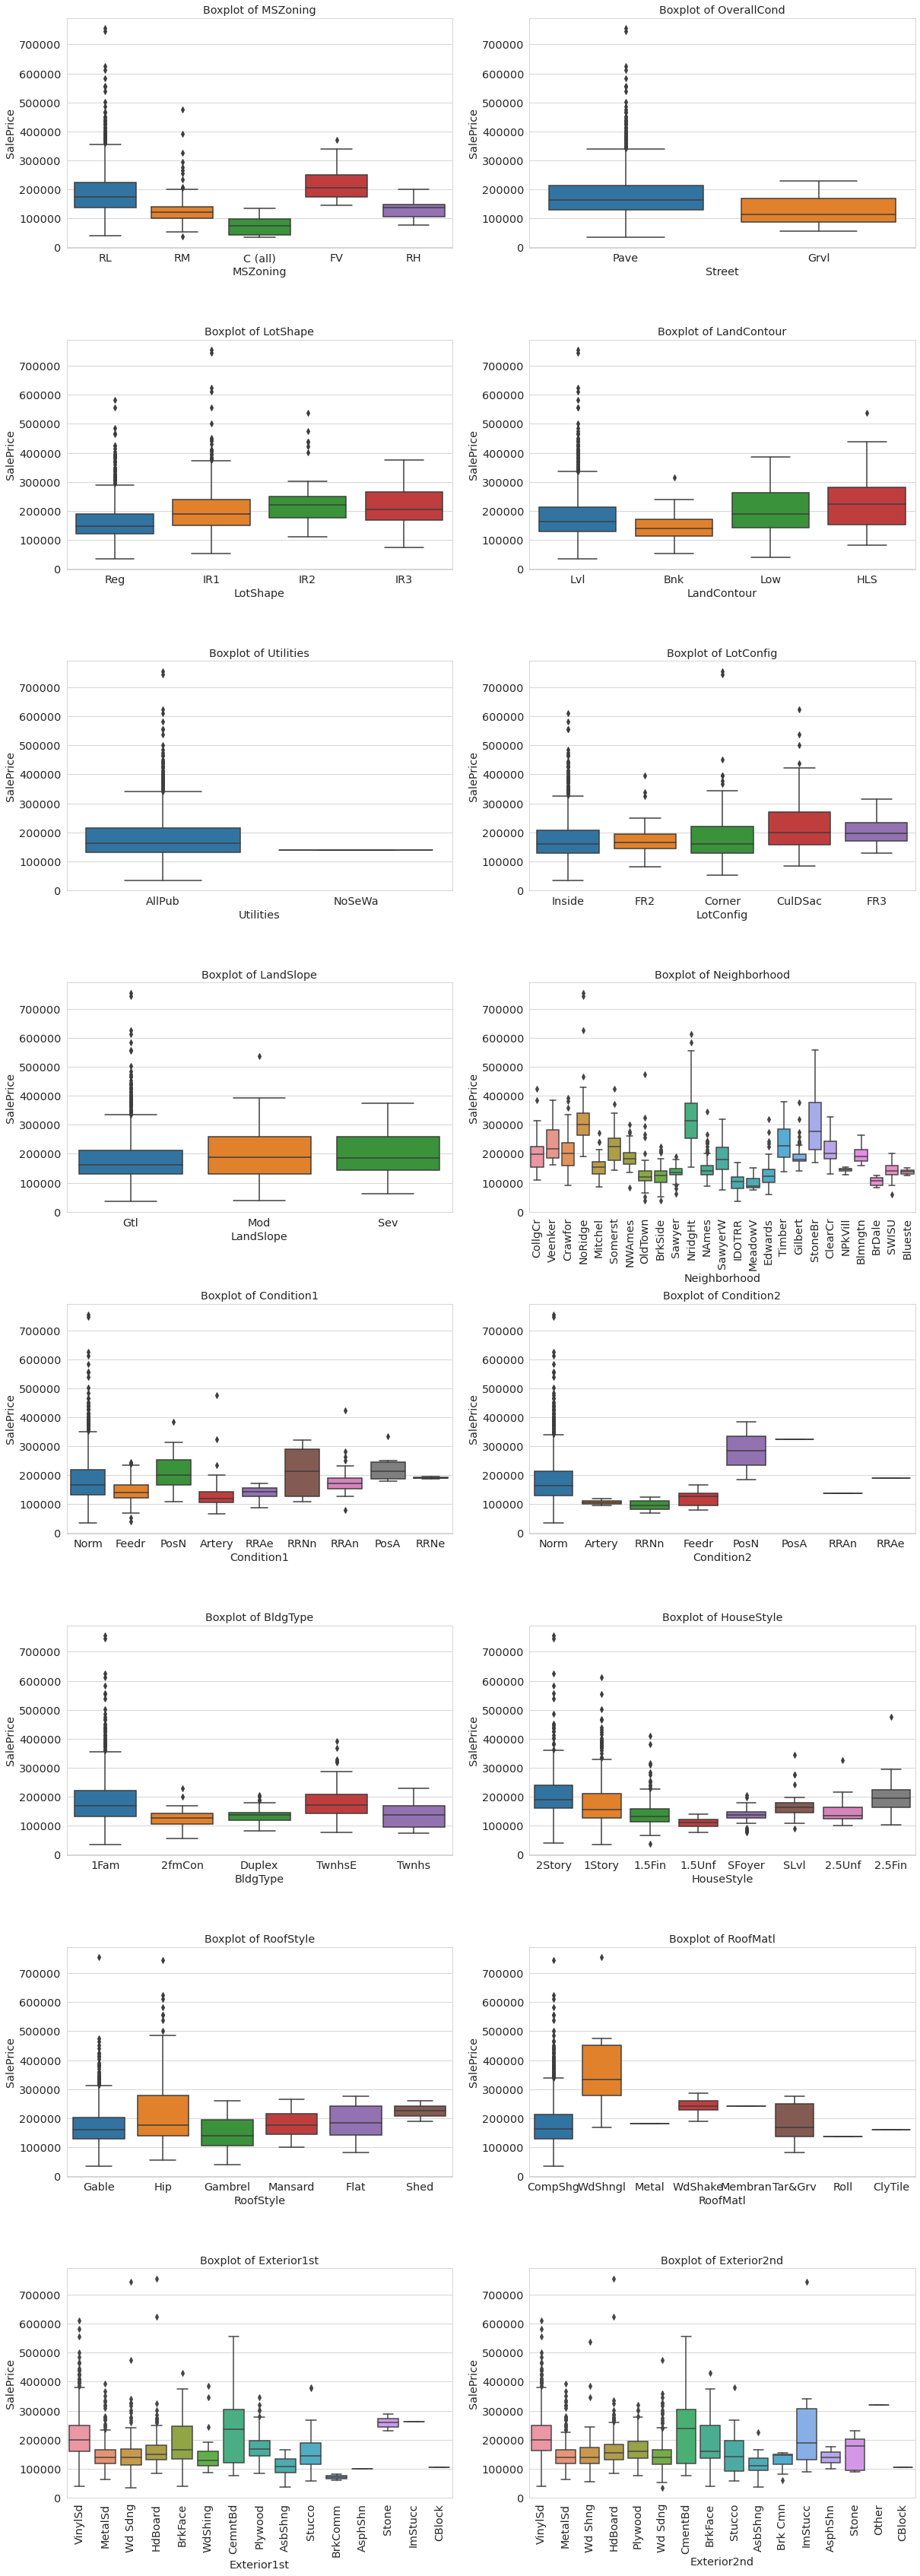

In [ ]:
## PLotting boxplot of all the categorical variable vs target column for Bivariate Analysis
size = (20, 60)

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .4, wspace=.2)

sns.boxplot(x=CategoricData['MSZoning'],y=CategoricData['SalePrice'],ax=axs[0][0], ).set_title("Boxplot of MSZoning")
sns.boxplot(x=CategoricData['Street'],y=CategoricData['SalePrice'],ax=axs[0][1] ).set_title("Boxplot of OverallCond")

sns.boxplot(x=CategoricData['LotShape'],y=CategoricData['SalePrice'],ax=axs[1][0], ).set_title("Boxplot of LotShape")
sns.boxplot(x=CategoricData['LandContour'],y=CategoricData['SalePrice'],ax=axs[1][1] ).set_title("Boxplot of LandContour")

sns.boxplot(x=CategoricData['Utilities'],y=CategoricData['SalePrice'],ax=axs[2][0], ).set_title("Boxplot of Utilities")
sns.boxplot(x=CategoricData['LotConfig'],y=CategoricData['SalePrice'],ax=axs[2][1] ).set_title("Boxplot of LotConfig")

sns.boxplot(x=CategoricData['LandSlope'],y=CategoricData['SalePrice'],ax=axs[3][0], ).set_title("Boxplot of LandSlope")
ax=sns.boxplot(x=CategoricData['Neighborhood'],y=CategoricData['SalePrice'],ax=axs[3][1] )
ax.set_title("Boxplot of Neighborhood")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

sns.boxplot(x=CategoricData['Condition1'],y=CategoricData['SalePrice'],ax=axs[4][0], ).set_title("Boxplot of Condition1")
sns.boxplot(x=CategoricData['Condition2'],y=CategoricData['SalePrice'],ax=axs[4][1] ).set_title("Boxplot of Condition2")

sns.boxplot(x=CategoricData['BldgType'],y=CategoricData['SalePrice'],ax=axs[5][0], ).set_title("Boxplot of BldgType")
sns.boxplot(x=CategoricData['HouseStyle'],y=CategoricData['SalePrice'],ax=axs[5][1] ).set_title("Boxplot of HouseStyle")

sns.boxplot(x=CategoricData['RoofStyle'],y=CategoricData['SalePrice'],ax=axs[6][0], ).set_title("Boxplot of RoofStyle")
sns.boxplot(x=CategoricData['RoofMatl'],y=CategoricData['SalePrice'],ax=axs[6][1] ).set_title("Boxplot of RoofMatl")

ax=sns.boxplot(x=CategoricData['Exterior1st'],y=CategoricData['SalePrice'],ax=axs[7][0], )
ax.set_title("Boxplot of Exterior1st")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax=sns.boxplot(x=CategoricData['Exterior2nd'],y=CategoricData['SalePrice'],ax=axs[7][1] )
ax.set_title("Boxplot of Exterior2nd")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

## Continous vs Target variable

In [ ]:
#Bivariate Analysis for actual categorical Variables with Attrition
NumericData['SalePrice']=Train['SalePrice']
sns.pairplot(NumericData)

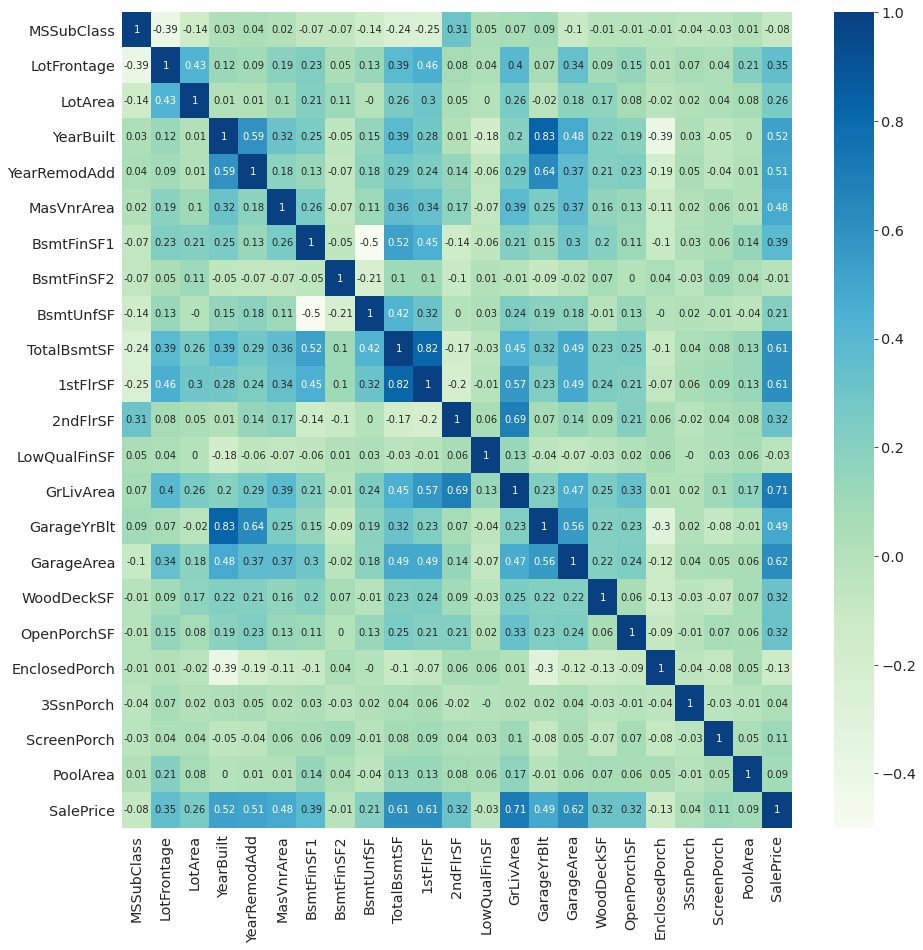

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(round(NumericData.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

### Assessing importance of Features on Target Column

In [ ]:
# here the dataset is loaded again beecause it is needed for statistical analysis below, it could be also done by making a copy
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
## Separating quantitative and qualitattive features by their data types, object is categorical and others are numerical feature
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

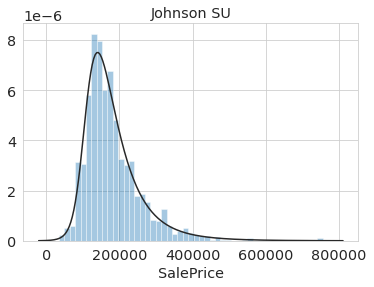

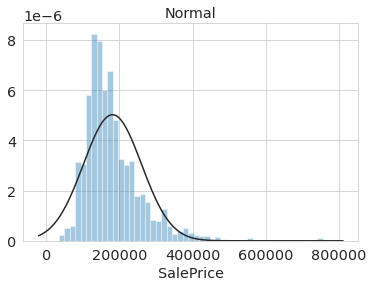

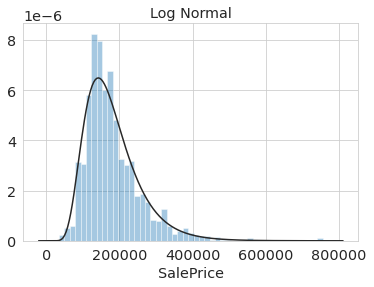

In [ ]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

In [ ]:
# Performing the Shapiro test
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(Train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


None of quantitative variables has normal distribution so these should be transformed as well.

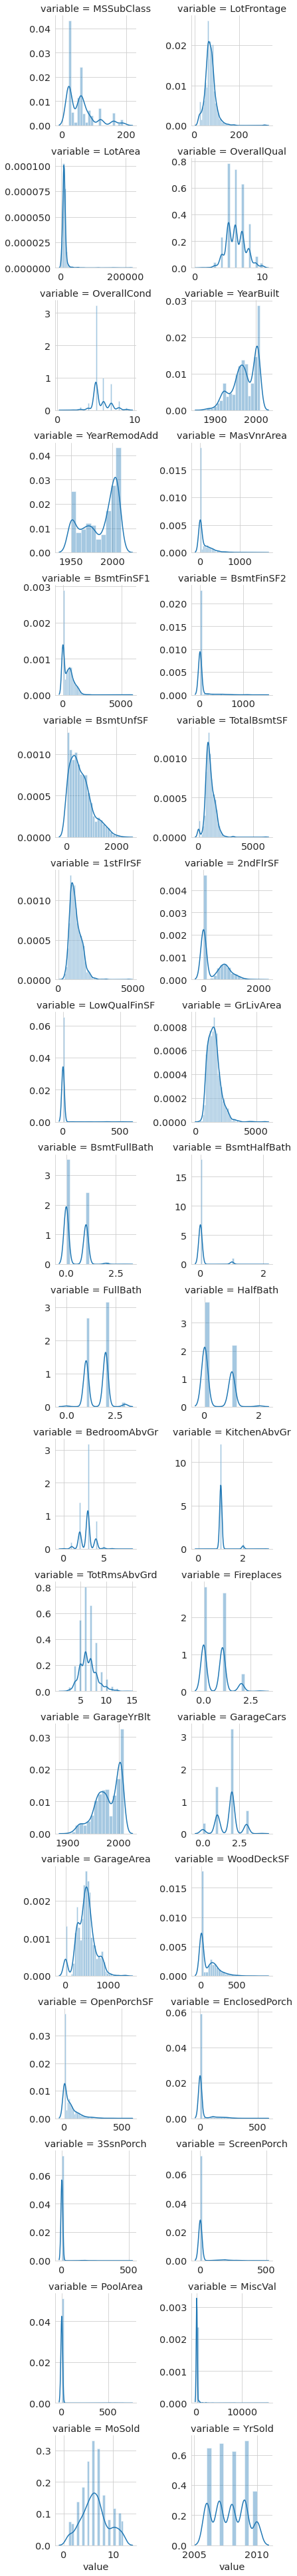

In [ ]:
# pd.melt is to combine the quantitative feature columns into a dataset
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others. While ganining on regression transformation will smooth out some irregularities which could be important like large amount of houses with 0 2ndFlrSF. Such irregularities are good candidates for feature construction.

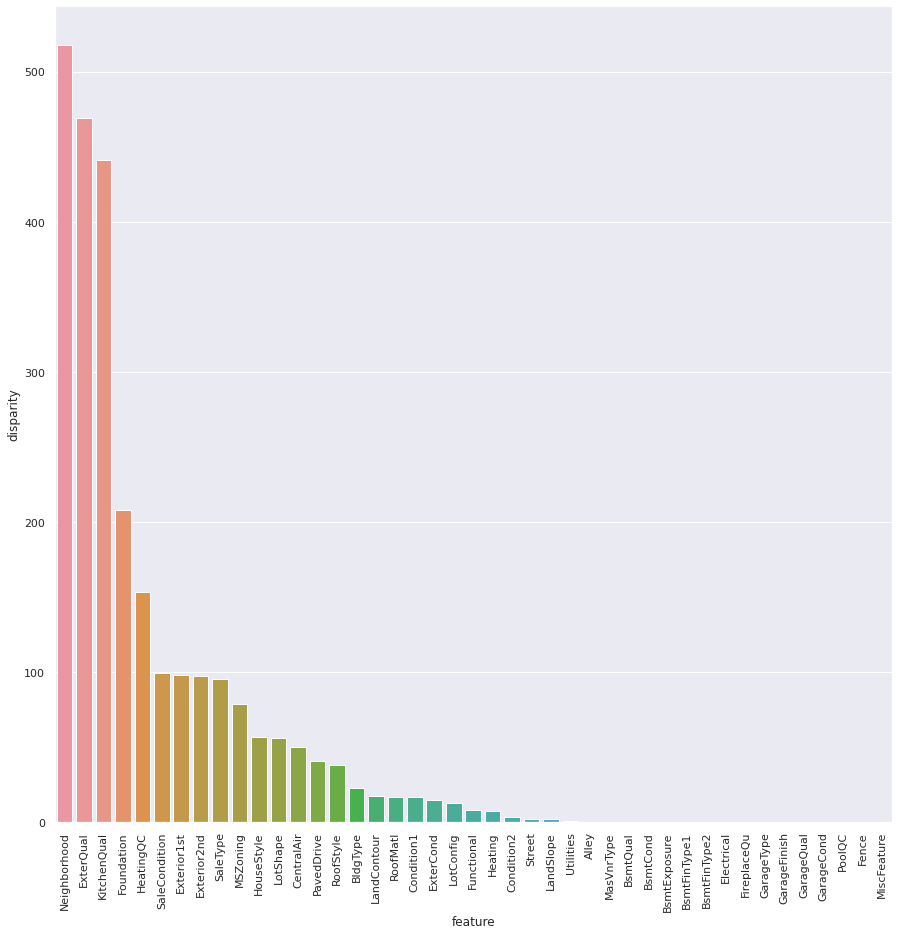

In [ ]:
#function to perform anova test
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
sns.set(rc={'figure.figsize':(20,12)})
x=plt.xticks(rotation=90)

Here is quick estimation of influence of categorical variable on SalePrice. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

We encode the qualitative variables according to ordering based on mean of SalePrice.

In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


# Correlations

Generally to reduce confunding only variables uncorrelated with each other should be added to regression models (which are correlated with SalePrice).

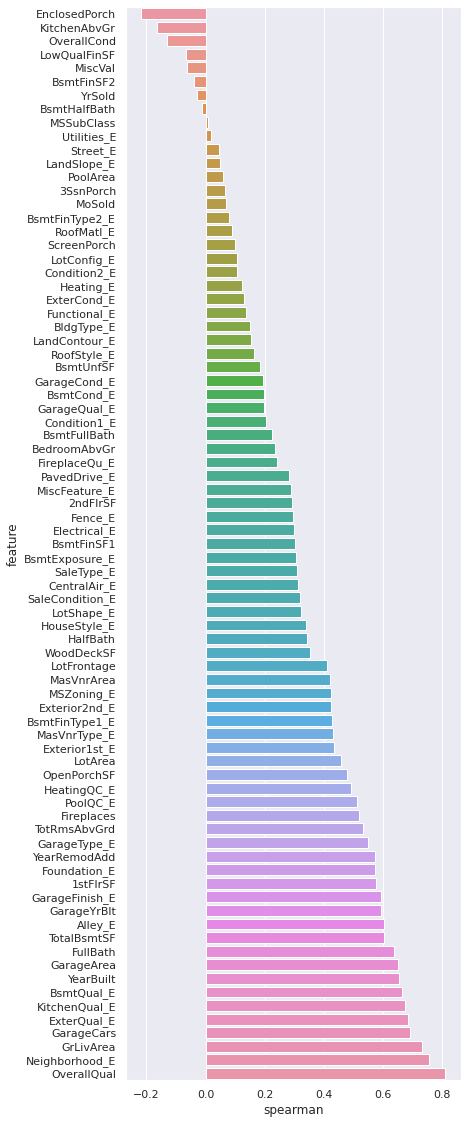

In [ ]:
# function to get spearman correlation value and plot them in a barplot
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. OverallQual is main criterion in establishing house price. Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations.

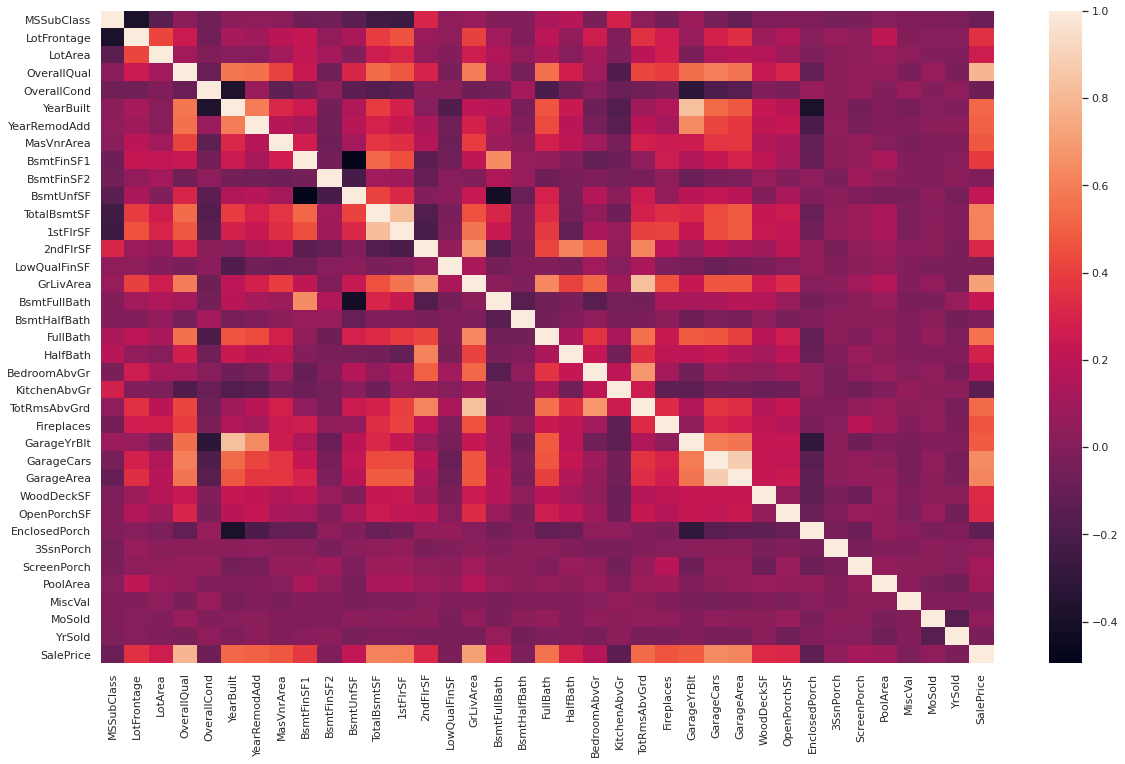

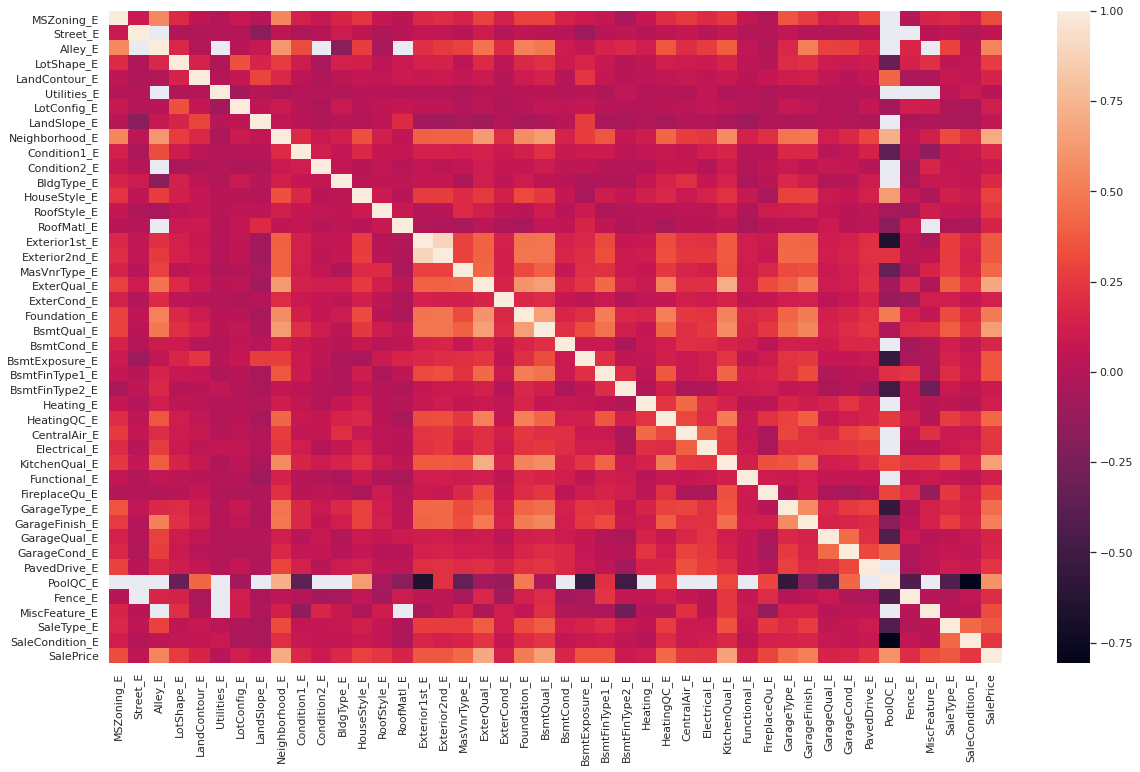

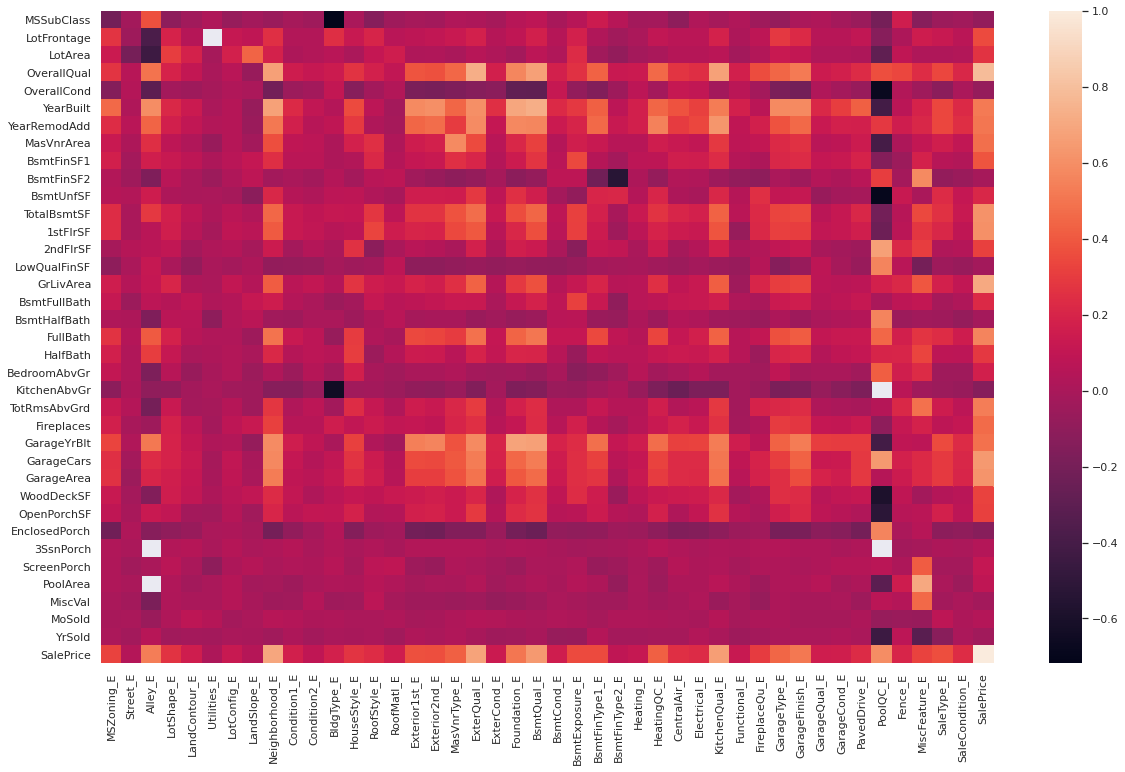

In [ ]:
#Plotting correlation heatmap
plt.figure(1)
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr)

There are many strong correlations between variables. Garages seem to be built same year as houses, basements have generally same area as first floor which is pretty obvious. Garage area is strongly correlated with number of cars. Neighborhood is correlated with lots of other variables and this confirms the idea that houses in same region share same characteristics. Dwelling type is negatively correlated with kitchen above grade square feet.

## Pairplots
It also would be useful to see how sale price compares to each independent variable.

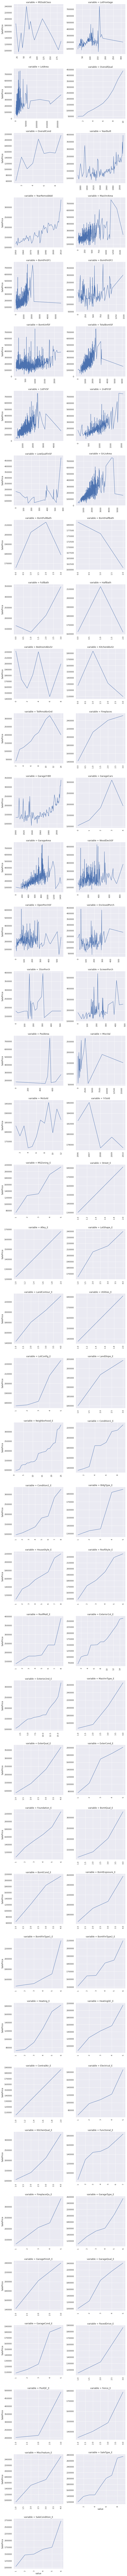

In [ ]:
#function to plot pairplot between feature
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

There are lots of nonlinearities this may be the cause why some variables wont be selected by Lasso/Lars. Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E look like they would benefit from adding quadratic term to regression. But on the other hand this will most probably provoke overfit.

## Price Segments
It is possible that correlations shift with change of SalePrice.

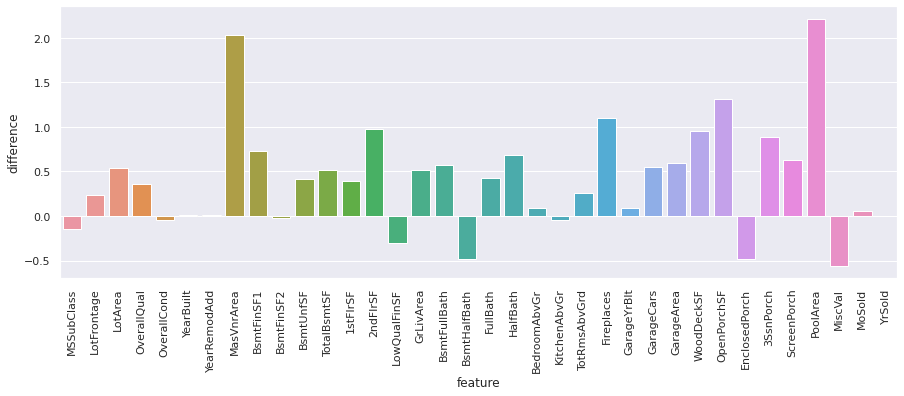

In [ ]:
features = quantitative

# to filter the standard means the dataset where saleprice is less 200k and pricey means price more than 200k
standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

plt.figure(figsize=(15,5))
sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

Here houses are divided in two price groups: cheap (under 200000) and expensive. Then means of quantitative variables are compared. Expensive houses have pools, better overall qual and condition, open porch and increased importance of MasVnrArea.

# Doing EDA using Automatic EDA Libraries

In [ ]:
!pip install dataprep -q

     |████████████████████████████████| 194kB 5.1MB/s 
     |████████████████████████████████| 368kB 30.6MB/s 
     |████████████████████████████████| 10.1MB 32.7MB/s 
     |████████████████████████████████| 1.3MB 35.6MB/s 
     |████████████████████████████████| 849kB 30.9MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 1.5MB 30.7MB/s 
     |████████████████████████████████| 727kB 25.3MB/s 
     |████████████████████████████████| 296kB 44.3MB/s 
     |████████████████████████████████| 143kB 48.2MB/s 
     |████████████████████████████████| 112kB 50.6MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 


In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing


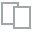
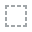
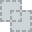
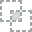
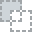
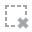
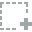
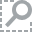
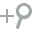
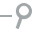
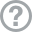
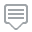
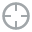
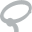
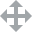
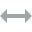
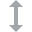
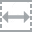
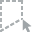
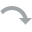
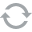
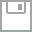
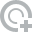
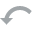
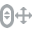
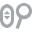
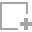
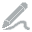
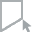
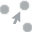
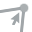
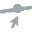

In [ ]:
plot(train)

In [ ]:
create_report(train)